In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.image as mpimg


# SVD Decomposition

In [2]:
img = mpimg.imread('./image.jpg')
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])
gray = rgb2gray(img)

تصویر استفاده شده یک تصویر سیاه سفید 599*800 پیکسل می باشد که با استفاده از تابع معرفی شده سعی شده 3 لایه ی

rgb

را به یک لایه ی 

grayscale

تبدیل کنیم
ابعاد و خود تصویر در ادامه پرینت شده است

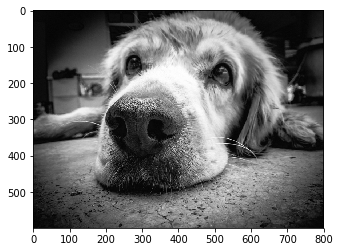

In [3]:
imgplot = plt.imshow(gray, cmap=plt.get_cmap('gray'))

In [4]:
matrix = np.array(gray)
matrix.shape

(599, 800)

In [5]:
gray

array([[10.9989,  9.999 , 11.9988, ..., 18.9981, 19.998 , 19.998 ],
       [10.9989, 11.9988, 11.9988, ..., 19.998 , 19.998 , 18.9981],
       [11.9988,  9.999 ,  9.999 , ..., 20.9979, 21.9978, 21.9978],
       ...,
       [ 6.9993,  6.9993,  6.9993, ...,  4.9995,  5.9994,  5.9994],
       [ 7.9992,  6.9993,  6.9993, ...,  5.9994,  6.9993,  4.9995],
       [ 6.9993,  5.9994,  5.9994, ...,  5.9994,  7.9992,  5.9994]])

In [6]:
from scipy import linalg

In [7]:
U, s, Vh = linalg.svd(matrix)

در ادامه مقادیر منفرد تابع را که به صورت نزولی مرتب شده است بر روی نمودار چاپ میکنیم

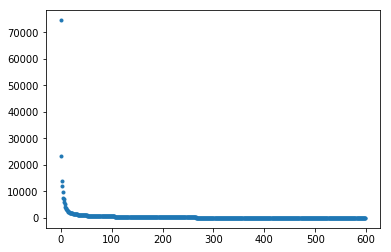

In [8]:
# print Singular Values
plt.plot(s, '.')

In [9]:
def printImage(n, U, s ,Vh):
    img = np.matmul(np.matmul(U[:,:n] , np.diag(s[:n])) , Vh[:n,:])
    return img

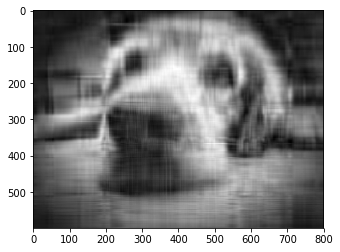

In [10]:
# compress by r = 10
imgplot = plt.imshow(printImage(10, U, s, Vh), cmap=plt.get_cmap('gray'))

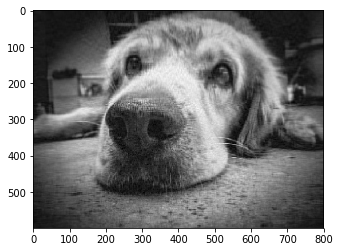

In [11]:
# compress by r = 50
imgplot = plt.imshow(printImage(50, U, s, Vh), cmap=plt.get_cmap('gray'))

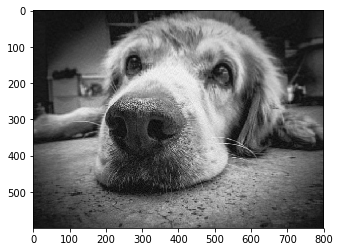

In [12]:
# compress by r = 100
imgplot = plt.imshow(printImage(100, U, s, Vh), cmap=plt.get_cmap('gray'))

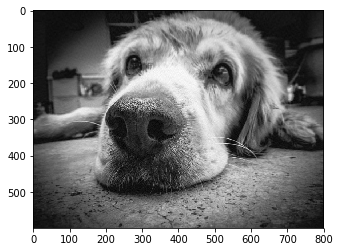

In [13]:
# compress by r = 150
imgplot = plt.imshow(printImage(150, U, s, Vh), cmap=plt.get_cmap('gray'))

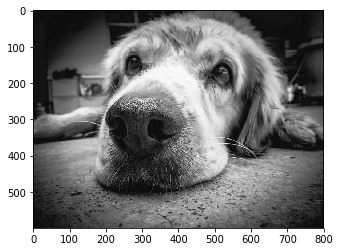

In [14]:
# compress by r = 200
imgplot = plt.imshow(printImage(200, U, s, Vh), cmap=plt.get_cmap('gray'))

به نظر میرسد که مقدار 10 برای حفظ کیفیت کم بوده باشد و مقدار 50 برای نمایش تصویر با کاهش تصویر مناسب باشد
ولی برای آن که حجم تصویر بدون آنکه چشم انسان قادر به تشخیص کاهش کیفیت باشد اعداد بین 100 و 150 به نظر کاملا مناسب می باشد و بین 150 و 200 هیچ تفاوت خاصی مشهود نمی باشد
به نظر میرسد عددی مانند 115 برای این هدف مناسب باشد


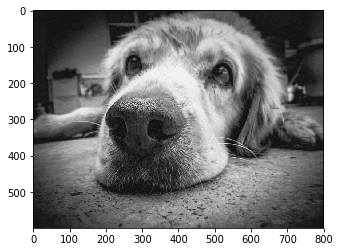

In [15]:
# compress by r = 115
imgplot = plt.imshow(printImage(115, U, s, Vh), cmap=plt.get_cmap('gray'))

# PCA

In [16]:
img = mpimg.imread('./image.jpg')
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])
gray = rgb2gray(img)

In [17]:
matrix = np.array(gray)
matrix.shape

(599, 800)

In [18]:
avg = []
demeanMatrix = []
for i in range(matrix.shape[1]):
    avg.append(np.mean(matrix[:,i]))
    demeanMatrix.append(matrix[:,i] - avg[-1])

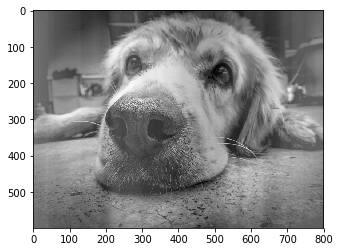

In [19]:
demeanMatrix = np.array(demeanMatrix)
demeanMatrix = np.transpose(demeanMatrix)

imgplot = plt.imshow(demeanMatrix, cmap=plt.get_cmap('gray'))

In [20]:
c = np.matmul(np.transpose(demeanMatrix), demeanMatrix) / (demeanMatrix.shape[1] - 1)

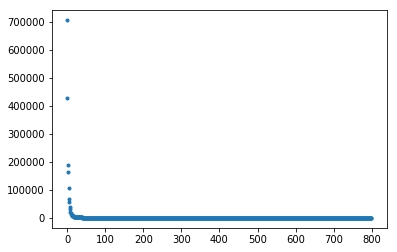

In [21]:
from numpy import linalg as LA
w, v = LA.eig(c)
w = np.real(w)
plt.plot(w, '.')


In [22]:
def compress(n, X, p):
    img = np.matmul(X , p[:,:n])
    return img

In [23]:
def createImage(n):
    Y = compress(n, demeanMatrix, v)
    img = np.matmul(Y, np.transpose(v[:,:n]))
    for i in range(img.shape[1]):
        img[:,i] += avg[i]
    img = np.real(img)
    return img

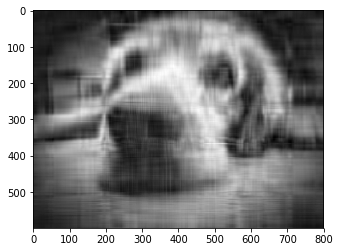

In [24]:
# compress by r = 10
imgplot = plt.imshow(createImage(10), cmap=plt.get_cmap('gray'))

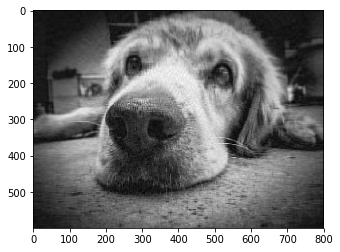

In [25]:
# compress by r = 50
imgplot = plt.imshow(createImage(50), cmap=plt.get_cmap('gray'))

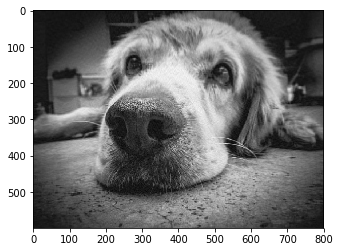

In [26]:
# compress by r = 100
imgplot = plt.imshow(createImage(100), cmap=plt.get_cmap('gray'))

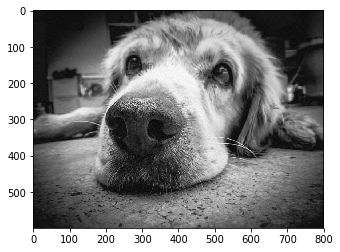

In [27]:
# compress by r = 150
imgplot = plt.imshow(createImage(150), cmap=plt.get_cmap('gray'))

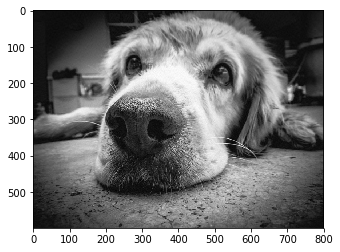

In [28]:
# compress by r = 200
imgplot = plt.imshow(createImage(200), cmap=plt.get_cmap('gray'))

به نظر میرسد که مقدار 10 برای حفظ کیفیت کم بوده باشد و مقدار 50 برای نمایش تصویر با کاهش تصویر مناسب باشد
ولی برای آن که حجم تصویر بدون آنکه چشم انسان قادر به تشخیص کاهش کیفیت باشد اعداد بین 100 و 150 به نظر کاملا مناسب می باشد و بین 150 و 200 هیچ تفاوت خاصی مشهود نمی باشد
به نظر میرسد عددی مانند 115 برای این هدف مناسب باشد


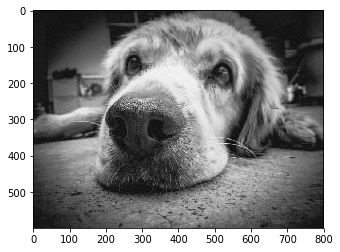

In [29]:
# compress by r = 115
imgplot = plt.imshow(createImage(115), cmap=plt.get_cmap('gray'))

# مقایسه و نتیجه گیری

برای مقایسه، اختلاف تصاویر را برای

r = 115

با تصویر اصلی به دست می آوریم و با یکدیگر مقایسه میکنیم

### SVD

In [30]:
org = mpimg.imread('./image.jpg')
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])
org = rgb2gray(img)

In [31]:
# compress by r = 115
svd = printImage(115, U, s, Vh)
diffSVD = org - svd
normSVD = LA.norm(diffSVD)
print(normSVD)

4085.173695877103


### pca

In [32]:
# compress by r = 115
pca = createImage(115)
diffPCA = org - pca
normPCA = LA.norm(diffPCA)
print(normPCA)

4074.640933244903


با توجه به آنکه

pca

مقدار دقیق تری را نشان داد میتوان نتیجه گرفت که 

pca

اندکی بهتر عمل میکند. گرچه این اختلاف چندان چشمگیر نمی باشد.